##  TUGAS PRAKTIKUM

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

    Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
    Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
    meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
    dengan gamma correction sesuai rumus yang telah diberikan

    ```python
    print(' Gamma Correction pada citra ')
    print('----------------------------------')
    try:
    gamma = int(input('Masukkan nilai Gamma: '))
    except ValueError:
    print('Error, not a number')
    ```

    Jawab:


In [22]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


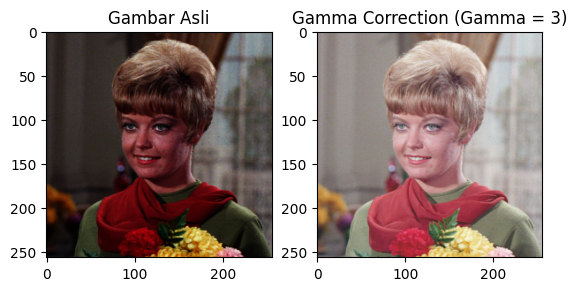

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

print('Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (Gamma = {gamma})')

plt.show()

Kode program di atas bertujuan untuk mengaplikasikan Gamma Correction pada sebuah gambar, sebuah teknik yang berguna untuk menyesuaikan kecerahan gambar berdasarkan parameter gamma yang dimasukkan oleh pengguna. Gambar asli dan hasil yang sudah dikoreksi gamma ditampilkan berdampingan untuk dibandingkan secara visual.


---



2. **Buat Simulasi Image Depth**

  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
  pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
  pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
  255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
  0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
  7bit, maka jumlah warnanya adalah 27 = 128, dst.

  Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
  silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar

  ```python
  bit_depth=2
  level = 255 / (pow(2,bit_depth)-1)
  original = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
  Images/female.tiff', cv.IMREAD_GRAYSCALE)
  depth_image = np.zeros(original.shape, original.dtype)
  ```

  Jawab :

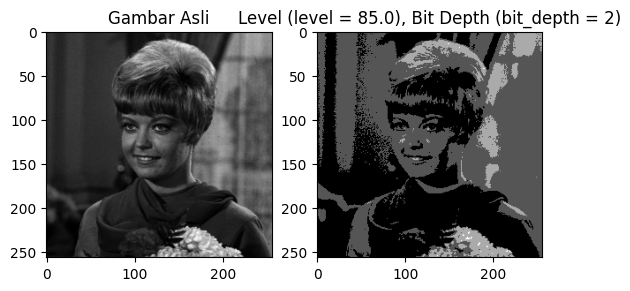

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar dalam format grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Proses kuantisasi
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

# Menampilkan gambar
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')  # Menampilkan gambar grayscale asli
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')  # Menampilkan hasil kuantisasi bit depth
plt.title(f'Level (level = {level}), Bit Depth (bit_depth = {bit_depth})')

plt.show()


Kode program di atas bertujuan untuk mengurangi bit depth dari sebuah citra grayscale. Dengan menurunkan bit depth, jumlah tingkat keabuan pada gambar berkurang, sehingga gambar menjadi lebih sederhana dan mungkin terlihat lebih terkotak-kotak (dengan lebih sedikit detail). Ini merupakan salah satu teknik kuantisasi yang sering digunakan dalam pengolahan citra digital untuk mengurangi ukuran file atau menyesuaikan gambar untuk perangkat dengan kemampuan tampilan terbatas.



---



3. **Buat modul Average Denoising**

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
  sebelumnya.
  Citra asli sudah disediakan pada /images/galaxy.jpg.
  100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
  Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
  gunakan modul glob (import glob)

  ```python
  cv_img = []
  for img in glob.glob('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
  Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)
  ```

  Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut menggunakan cv_img[0], cv_img[1], dst.

  Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan kesimpulan anda:

  Jawab:

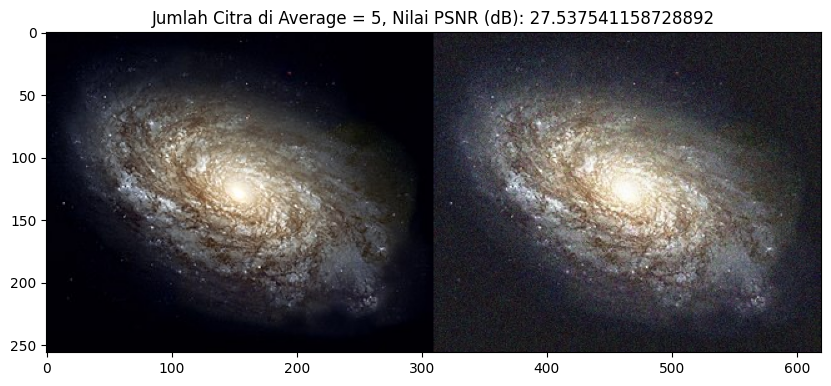

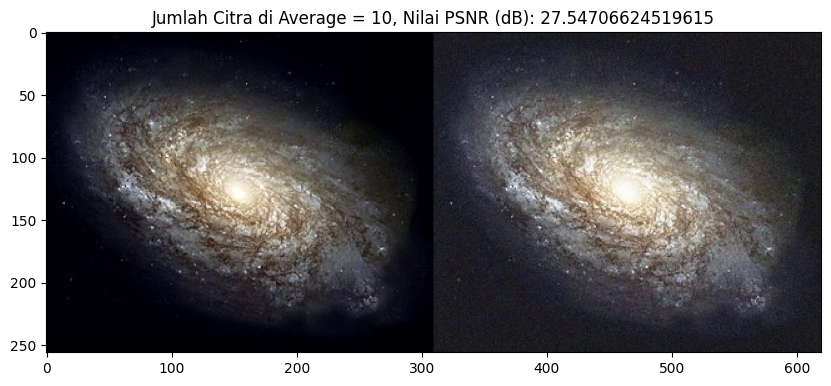

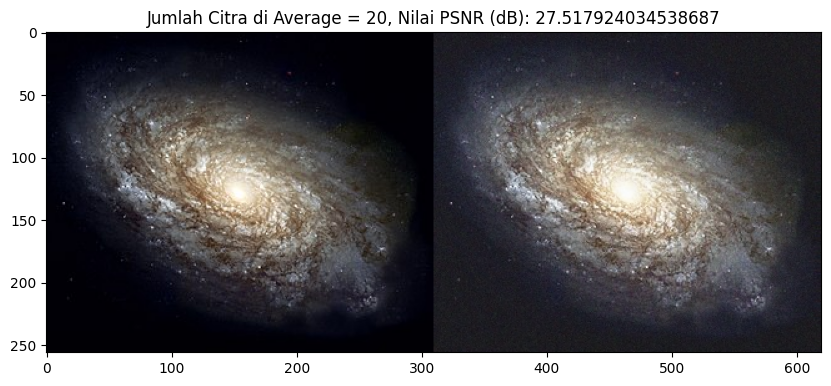

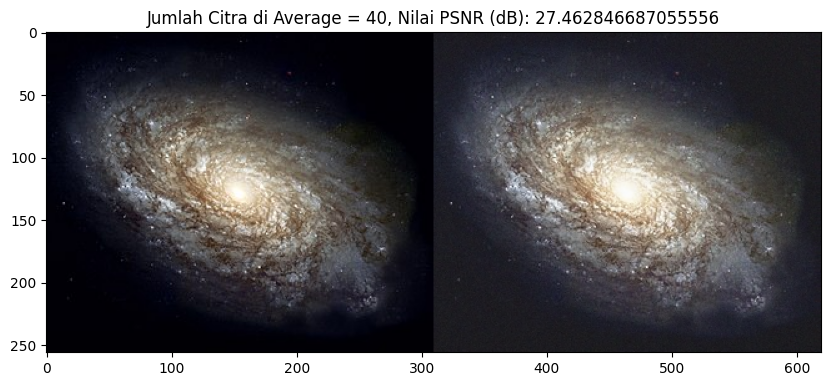

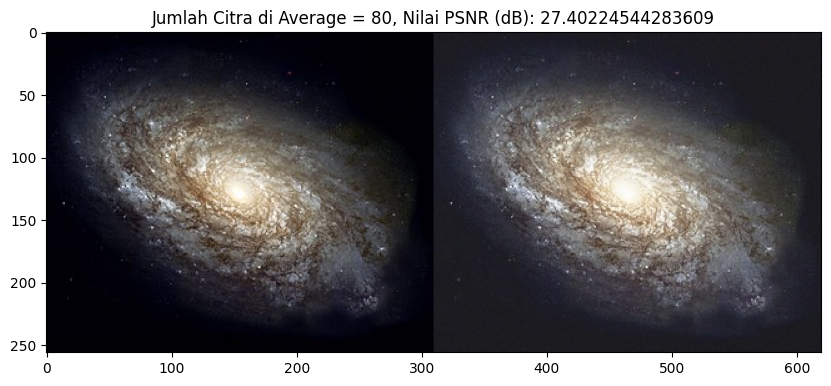

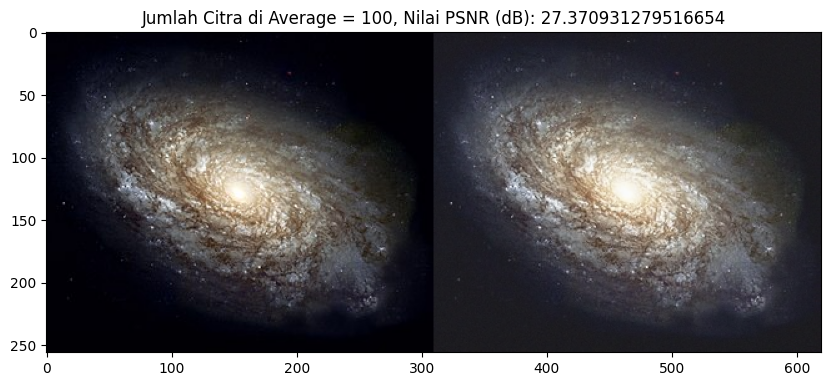

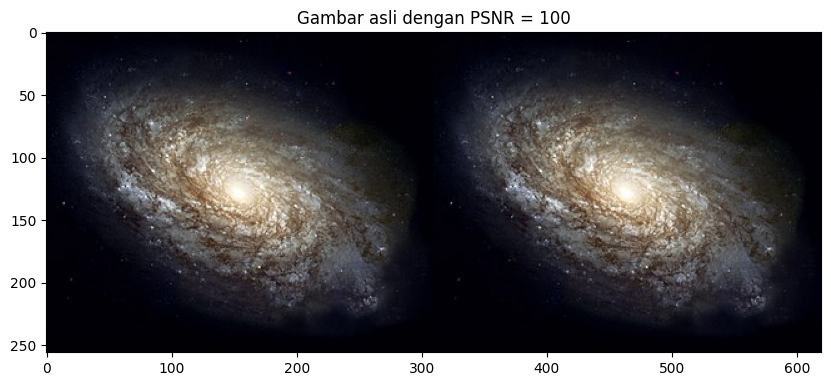

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)  # Menghitung Mean Squared Error (MSE)
    if mse == 0:  # Jika tidak ada noise, PSNR mencapai maksimum
        psnr = 100
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Memuat gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Cek apakah gambar asli berhasil dimuat
if original is None:
    print("Error: Gambar asli tidak ditemukan atau path salah.")
else:
    # Daftar jumlah gambar dengan level noise berbeda yang akan di-average
    list_img = [5, 10, 20, 40, 80, 100]

    for img_count in list_img:
        # Membuat array kosong untuk menampung rata-rata gambar dengan noise
        average_noise = np.zeros_like(original, dtype=np.float32)

        # Memuat dan mengakumulasi gambar dengan noise
        for i in range(1, img_count + 1):
            noise = cv.imread(f'/content/drive/MyDrive/PCVK/noises/{i}.jpg')

            # Cek apakah gambar dengan noise berhasil dimuat
            if noise is None:
                print(f"Error: Gambar noise {i}.jpg tidak ditemukan atau path salah.")
                continue

            # Mengakumulasi gambar dengan noise
            average_noise += noise.astype(np.float32)

        # Merata-ratakan gambar yang diakumulasi
        average_noise /= img_count

        # Mengubah gambar yang telah dirata-ratakan kembali ke format uint8
        average_noise = np.clip(average_noise, 0, 255).astype(np.uint8)

        # Menghitung PSNR antara gambar asli dan gambar noise yang dirata-ratakan
        psnr = PSNR(original, average_noise)

        # Menggabungkan gambar asli dan gambar noise yang dirata-ratakan secara horizontal
        final_frame = cv.hconcat([original, average_noise])

        # Menampilkan gambar
        plt.figure(figsize=(10, 5))
        plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB agar tampilan benar
        plt.title(f"Jumlah Citra di Average = {img_count}, Nilai PSNR (dB): {psnr:}")
        plt.show()

    # PSNR antara gambar asli dan gambar yang dirata-rata (harusnya PSNR tertinggi)
    psnr = PSNR(original, original)
    final_frame = cv.hconcat([original, original])

    plt.figure(figsize=(10, 5))
    plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))  # Mengonversi BGR ke RGB untuk tampilan yang benar
    plt.title(f"Gambar asli dengan PSNR = {psnr:}")
    plt.show()

**Kesimpulan**

Kode di atas berfungsi untuk melakukan averaging (rata-rata) dari beberapa gambar yang mengandung noise dan kemudian menghitung nilai PSNR (Peak Signal-to-Noise Ratio) antara gambar asli dengan hasil rata-rata tersebut. Tujuan utama dari proses ini adalah untuk melihat seberapa baik pengurangan noise dilakukan dengan teknik averaging, serta bagaimana hal tersebut mempengaruhi kualitas gambar.

Dari gambar yang dihasilkan oleh kode program di atas, semakin tinggi nilai PSNR maka gambar hasil pengolahan akan semakin mendekati kualitas gambar asli. Dengan kata lain, noise berkurang dan gambar yang dihasilkan akan semakin jelas dan berkualitas tinggi.



---



4. **Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya**

  Jawab:

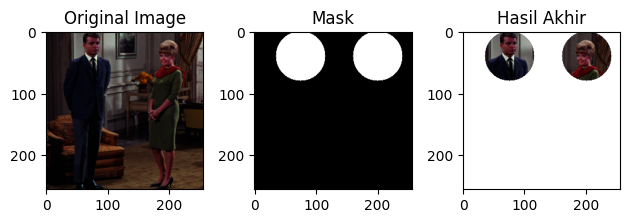

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/PCVK/couple.tiff'
img = cv.imread(image_path)

# Membuat mask dengan ukuran gambar
mask = np.zeros(img.shape[:2], dtype="uint8")

# Menggambar dua lingkaran
cv.circle(mask, (75, 40), 40, 255, -1)  # Lingkaran pertama
cv.circle(mask, (200, 40), 40, 255, -1)  # Lingkaran kedua

# Menggunakan bitwise AND untuk menerapkan mask pada gambar
masked = cv.bitwise_and(img, img, mask=mask)

# Mengonversi gambar yang dimask ke grayscale
tmp = cv.cvtColor(masked, cv.COLOR_BGR2GRAY)

# Mengatur threshold untuk membuat alpha channel
_, alpha = cv.threshold(tmp, 0, 255, cv.THRESH_BINARY)

# Memisahkan channel warna
b, g, r = cv.split(masked)

# Menggabungkan channel menjadi RGBA
rgba = [b, g, r, alpha]

# Menggabungkan menjadi gambar akhir
result = cv.merge(rgba)

plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('on')

plt.subplot(133)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGRA2RGBA))
plt.title('Hasil Akhir')
plt.axis('on')

plt.tight_layout()
plt.show()


Kode ini menunjukkan teknik dasar untuk membuat masking dan menambahkan transparansi pada gambar menggunakan alpha channel. Masking digunakan untuk menyorot bagian tertentu dari gambar, dalam hal ini dua lingkaran. Dengan menambahkan alpha channel, bagian gambar di luar lingkaran menjadi transparan, sehingga gambar hasil akhir memiliki format RGBA. Proses ini dapat digunakan untuk efek visual seperti highlight objek tertentu atau membuat elemen gambar transparan di sekitar objek yang diinginkan.



---



5. **Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu**

  Jawab :

  
  a. **Operator NOT**


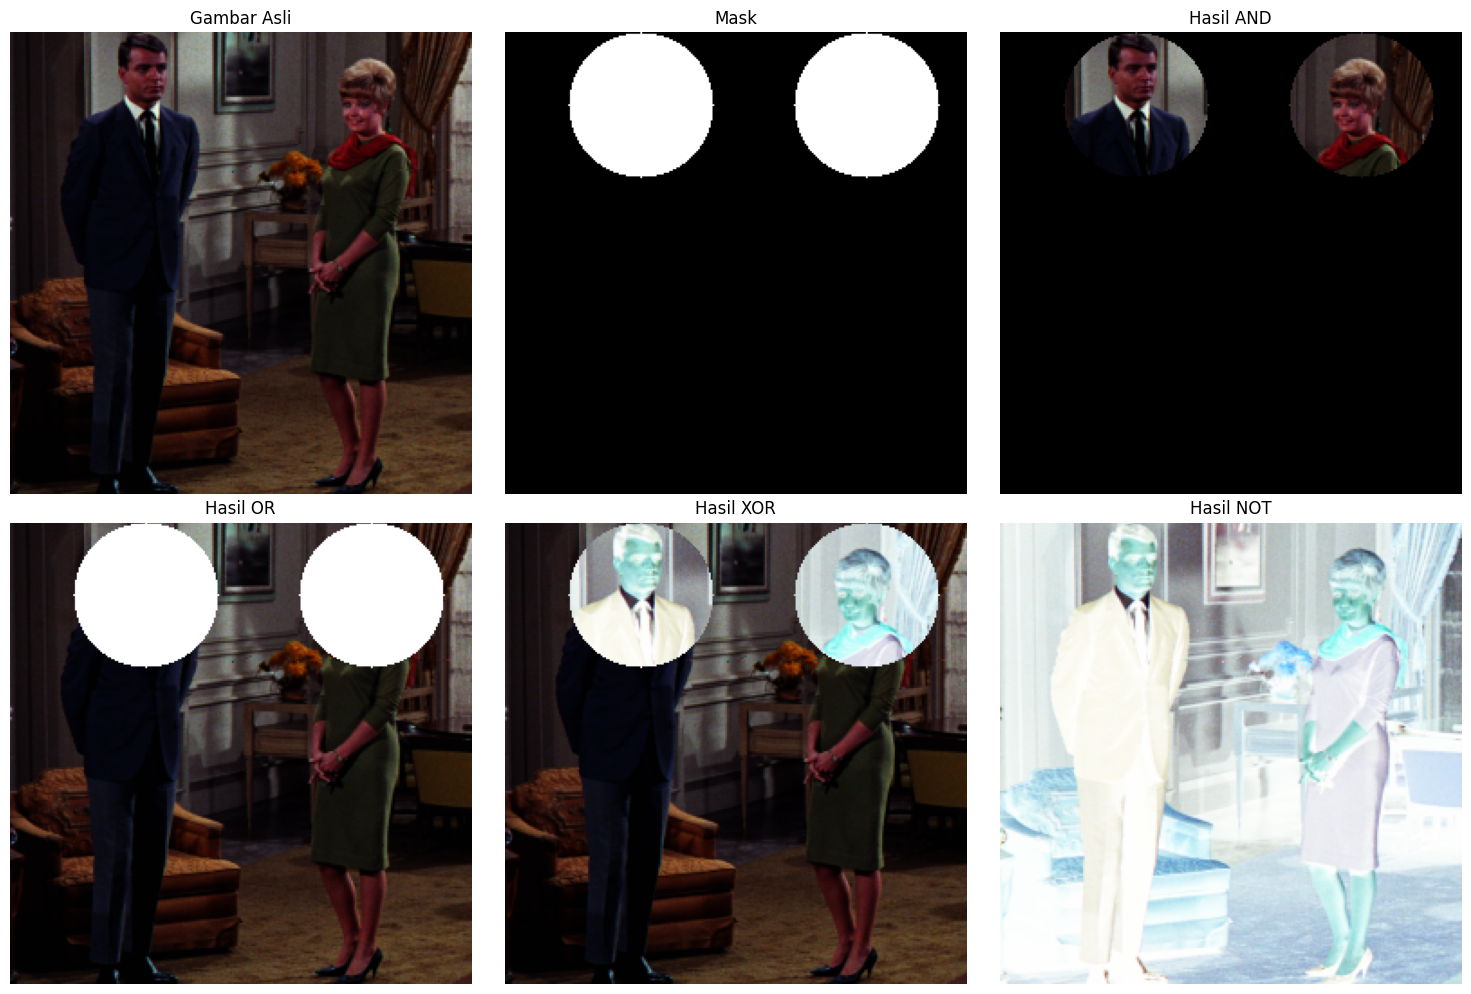

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Memuat gambar
image_path = '/content/drive/MyDrive/PCVK/couple.tiff'
img = cv.imread(image_path)

# Membuat mask dengan dua lingkaran
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 40), 40, (255, 255, 255), -1)

# Operasi Bitwise AND
result_and = cv.bitwise_and(img, mask)

# Operasi Bitwise OR
result_or = cv.bitwise_or(img, mask)

# Operasi Bitwise XOR
result_xor = cv.bitwise_xor(img, mask)

# Operasi Bitwise NOT
result_not = cv.bitwise_not(img)

# Menyiapkan subplot untuk menampilkan hasil
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Mask
plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask')
plt.axis('off')

# Hasil AND
plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(result_and, cv.COLOR_BGR2RGB))
plt.title('Hasil AND')
plt.axis('off')

# Hasil OR
plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(result_or, cv.COLOR_BGR2RGB))
plt.title('Hasil OR')
plt.axis('off')

# Hasil XOR
plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(result_xor, cv.COLOR_BGR2RGB))
plt.title('Hasil XOR')
plt.axis('off')

# Hasil NOT
plt.subplot(2, 3, 6)
plt.imshow(cv.cvtColor(result_not, cv.COLOR_BGR2RGB))
plt.title('Hasil NOT')
plt.axis('off')

plt.tight_layout()
plt.show()


Kode di atas melakukan serangkaian operasi bitwise pada sebuah gambar menggunakan OpenCV dan menampilkan hasilnya dalam subplot.


1. Operasi Bitwise:
    * AND: Menghasilkan gambar di mana hanya area dalam lingkaran yang menampilkan gambar asli; area di luar lingkaran menjadi hitam.
    * OR: Menampilkan gambar asli di area dalam lingkaran, tetapi area di luar juga tetap terlihat, membuat efek transparansi.
    * XOR: Menghasilkan gambar di mana area dalam lingkaran menunjukkan gambar asli, sementara area di luar lingkaran menjadi hitam.
    * NOT: Menampilkan gambar yang terbalik (negatif) dari gambar asli; semua warna akan dibalik.

2. Hasil Analisis

    * Gambar Asli: Menampilkan gambar yang dimuat tanpa modifikasi.
    * Mask: Gambar dengan dua lingkaran putih di atas latar hitam, berfungsi sebagai area untuk diterapkan pada operasi bitwise.
    * Hasil AND: Hanya area dalam lingkaran putih yang terlihat; ini berguna untuk isolasi bagian tertentu dari gambar.
    * Hasil OR: Mempertahankan gambar asli dengan penekanan pada area yang dimask; efek yang tampak lebih cerah.
    * Hasil XOR: Menyoroti perbedaan antara gambar asli dan mask; area di luar lingkaran menjadi hitam.
    * Hasil NOT: Menampilkan gambar yang terbalik (inverse), memberikan perspektif baru terhadap gambar asli.

Kesimpulan

Penggunaan operasi bitwise ini memberikan cara yang efektif untuk memanipulasi dan menampilkan bagian tertentu dari gambar. Setiap operasi menghasilkan efek visual yang berbeda, memungkinkan analisis yang lebih mendalam terhadap citra dan teknik pemrosesan citra dasar. Teknik ini sering digunakan dalam aplikasi seperti pengenalan objek, segmentasi gambar, dan efek visual.